In [1]:
print('23 paskaita')

23 paskaita


In [6]:
### Įvykdyti pasiruošiant kitų elementų vykdymui ###

import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
# import seaborn as sns
# import sqlite3
import mysql.connector as cnt
# import plotly.express as px

#prisijungimas prie mySQL, ir kursoriaus sukūrimas

DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

def pout(a, limit=5):
    if len(a) > limit:
        print(f'Rodoma {limit} eilutės iš {len(a)}')
    for k,i in enumerate(a):
        if k > limit-1:
            break
        l = []
        for n in i:
            f = f'{str(n):^16.16}'
            l.append(f)
        t = f'|{k:^3}|'+'|'.join(l)+'|'
        print(t)

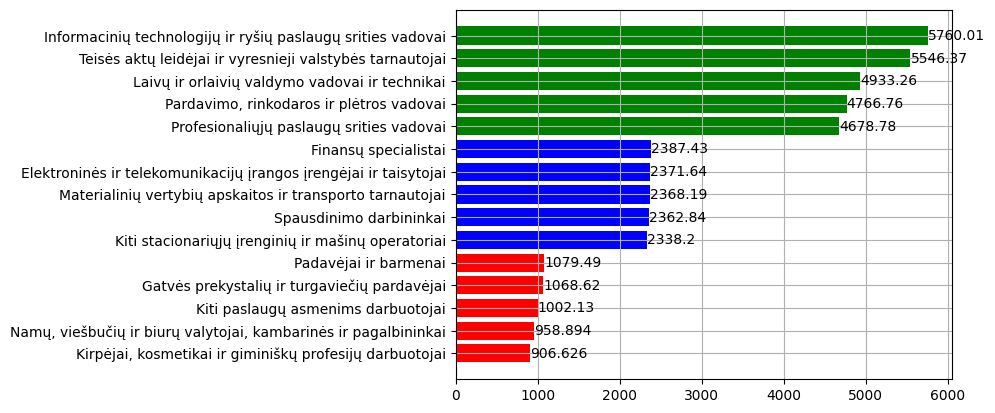

In [7]:
# Raskite 5 top 2014 metais apmokamas specialybes, atvaizduokite 
# jų vidutinį atlyginimą stulpeline diagrama (bar arba barh).
# Vietoj kodų - profesijų normalus pavadinimas!
# Visose užduotyse spalio duomenys.
# Raskite 5 mažiausiai apmokamas specialybes 2014 metais, atvaizduokite jų vidutinį atlyginimą su bar arba barh.
# Raskite 5 vidutiniškai apmokamas specialybes (0.9-1.1 VDU, imate arčiausiai 1.1 VDU esančias), atvaizduojate vidutinius atlyginimas su bar arba barh.

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
(select avg(du.bdu_spalio) viddu, p.Kodas, p.Profesija, 'Didžiausi'
from DUS2014N du
left join profesijos p
on du.profesija=p.Kodas
group by p.Kodas
order by viddu desc
limit 5)
	union all
(select avg(du.bdu_spalio) viddu, p.Kodas, p.Profesija,
abs(avg(du.bdu_spalio)-(select avg(du.bdu_spalio) from DUS2014N du)) skirtumas
from DUS2014N du
left join profesijos p
on du.profesija=p.Kodas
group by p.Kodas
order by skirtumas asc
limit 5)
	union all
(select avg(du.bdu_spalio) viddu, p.Kodas, p.Profesija, 'Mažiausi'
from DUS2014N du
left join profesijos p
on du.profesija=p.Kodas
group by p.Kodas
order by viddu asc
limit 5)
order by viddu asc
"""
C.execute(sql)
ans = C.fetchall()
# pout(ans)

atlyginimas, prof_kodas, prof_pvd, grupė = list(map(list,zip(*ans)))
# pr_kodas=list(map(str,prof_kodas))

# mėn3R=['Sau','Vas','Kov','Bal','Geg','Bir','Lie','Rgp','Rgs','Spa','Lap','Gru']
# vidMėnT=[-3.2,-3.2,0.4,6.7,12.4,15.4,17.9,17.1,12.3,7.2,1.9,-1.9]
# spalva=['blue' if t < 0 else 'green' for t in vidMėnT]
spalva=['red','red','red','red','red','blue','blue','blue','blue','blue','green','green','green','green','green']

fig, axis = plt.subplots()

p = axis.barh(prof_pvd,atlyginimas,color=spalva)
axis.bar_label(p)

axis.grid()
plt.show()

In [ ]:

# Tada surandate šių 15-kos specialybių atlyginimų pokytį tarp 2014 ir 2018 metų, pokytį vizualizuokite su bar arba barh. Kokios specialybėsm tas pokytis didžiausias?

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
(select avg(du.bdu_spalio) viddu, p.Kodas, p.Profesija, 'Didžiausi'
from DUS2014N du
left join profesijos p
on du.profesija=p.Kodas
group by p.Kodas
order by viddu desc
limit 5)
	union all
(select avg(du.bdu_spalio) viddu, p.Kodas, p.Profesija,
abs(avg(du.bdu_spalio)-(select avg(du.bdu_spalio) from DUS2014N du)) skirtumas
from DUS2014N du
left join profesijos p
on du.profesija=p.Kodas
group by p.Kodas
order by skirtumas asc
limit 5)
	union all
(select avg(du.bdu_spalio) viddu, p.Kodas, p.Profesija, 'Mažiausi'
from DUS2014N du
left join profesijos p
on du.profesija=p.Kodas
group by p.Kodas
order by viddu asc
limit 5)
    left join DUS2018N du18 on du18.profesija=p.Kodas
order by viddu asc
"""
C.execute(sql)
ans = C.fetchall()
# pout(ans)

atlyginimas, prof_kodas, prof_pvd, grupė = list(map(list,zip(*ans)))
# pr_kodas=list(map(str,prof_kodas))

# mėn3R=['Sau','Vas','Kov','Bal','Geg','Bir','Lie','Rgp','Rgs','Spa','Lap','Gru']
# vidMėnT=[-3.2,-3.2,0.4,6.7,12.4,15.4,17.9,17.1,12.3,7.2,1.9,-1.9]
# spalva=['blue' if t < 0 else 'green' for t in vidMėnT]
spalva=['red','red','red','red','red','blue','blue','blue','blue','blue','green','green','green','green','green']

fig, axis = plt.subplots()

p = axis.barh(prof_pvd,atlyginimas,color=spalva)
axis.bar_label(p)

axis.grid()
plt.show()